In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
data = pd.read_excel("car_prediction.xlsx")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data.shape

(205, 26)

Text(0.5, 1.0, 'Correlation between the columns')

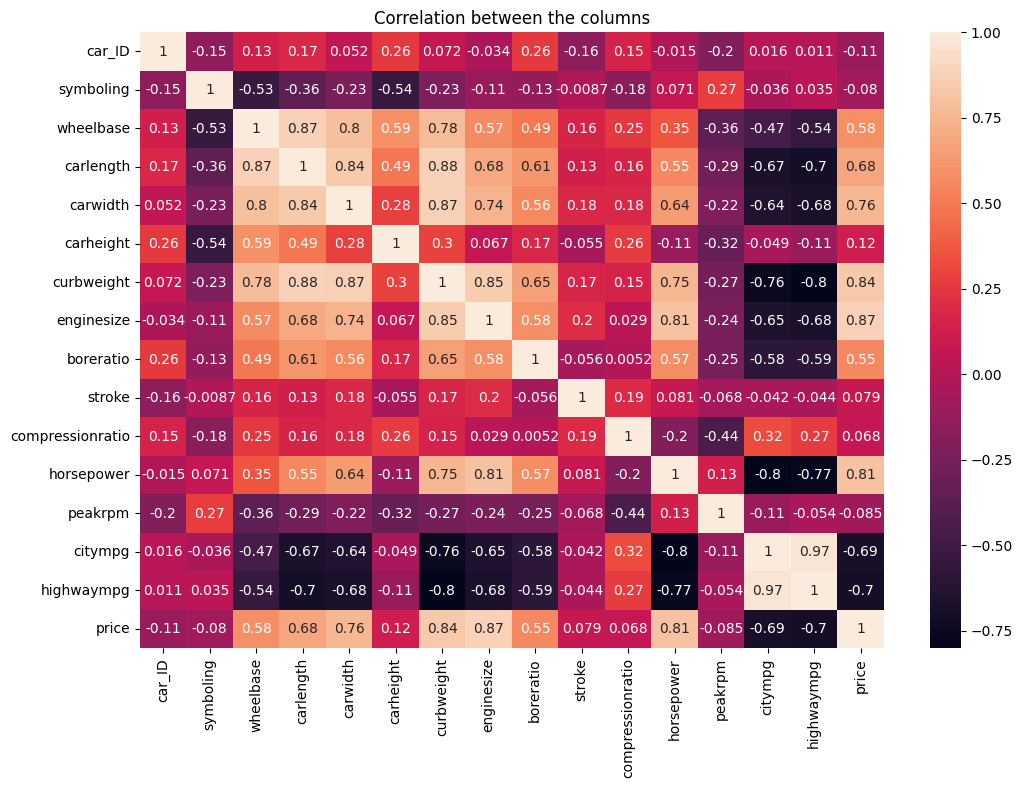

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation between the columns")

In [6]:
x = data.drop(['price','CarName','fueltype','car_ID','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], axis=1)
y = data['price'].values
print(f"x shape : {x.shape}  y shape : {y.shape}")

x shape : (205, 14)  y shape : (205,)


In [7]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.25,random_state=42)
print("X-train : ",x_train.shape)
print("X-test : ",x_test.shape)
print("y-train : ",y_train.shape)
print("y-test : ",y_test.shape)

X-train :  (153, 14)
X-test :  (52, 14)
y-train :  (153,)
y-test :  (52,)


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
pred = model.predict(x_test)

In [16]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MSE : ",(metrics.mean_squared_error(pred,y_test)))
print("MAE : ",(metrics.mean_absolute_error(pred,y_test)))
print("R2 Score : ",(metrics.r2_score(pred,y_test)))

MSE :  12778023.312240602
MAE :  2539.7416115618225
R2 Score :  0.7961095379581425


In [19]:
pred2 = model.predict([[3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27]])
pred2.round(2)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13579.49])